In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [2]:
filename='dataset/forestfires.csv'
names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']


In [3]:
df = pd.read_csv(filename,names=names,header=0)

In [4]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
print(pd.isnull(df).sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


## Descriptive statistics

In [6]:
df.shape

(517, 13)

In [7]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [8]:
df.head(6)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


In [9]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
df.corr(method='pearson')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [11]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

In [12]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Visualizing data

In [13]:
from matplotlib import pyplot as plt

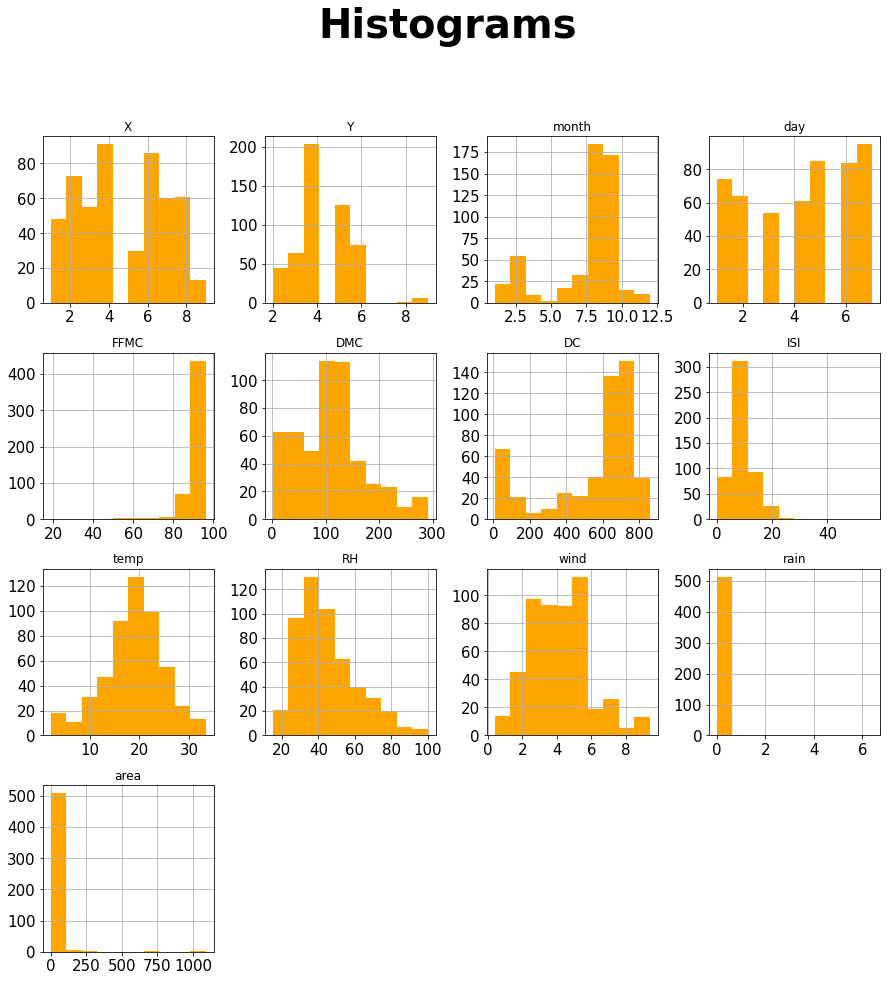

In [14]:
df.hist(sharex=False, sharey=False, xlabelsize=15, ylabelsize=15, color='orange', figsize=(15,15))
plt.suptitle('Histograms',y=1.00, fontweight='bold',fontsize=40)
plt.show()

## Probability density

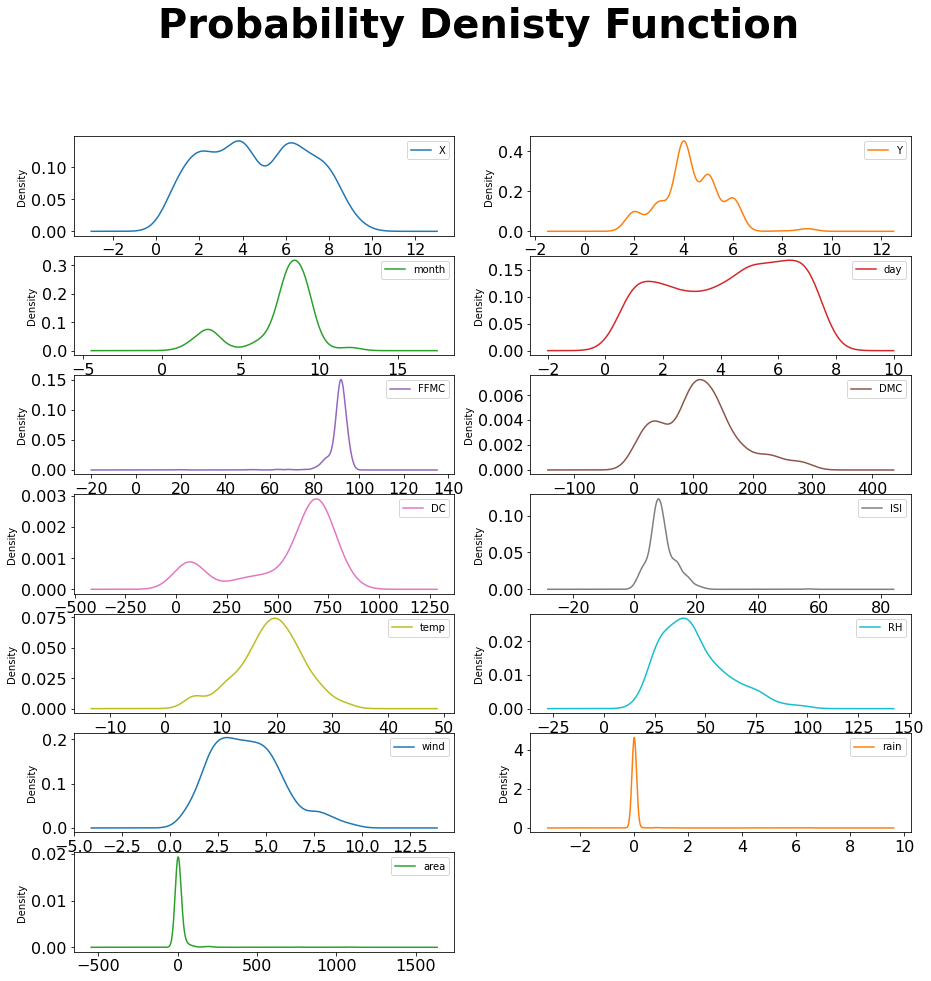

In [15]:
df.plot(kind='density',subplots=True,layout=(7,2),sharex=False,fontsize=16,figsize=(15,15))
plt.suptitle('Probability Denisty Function',y=1.00, fontweight='bold',fontsize=40)
plt.show()

Histograms and Probability Denisty functions convey the same information.

Hist --> are for discrete data

PDF --> are for continuous data

## Box and whisker

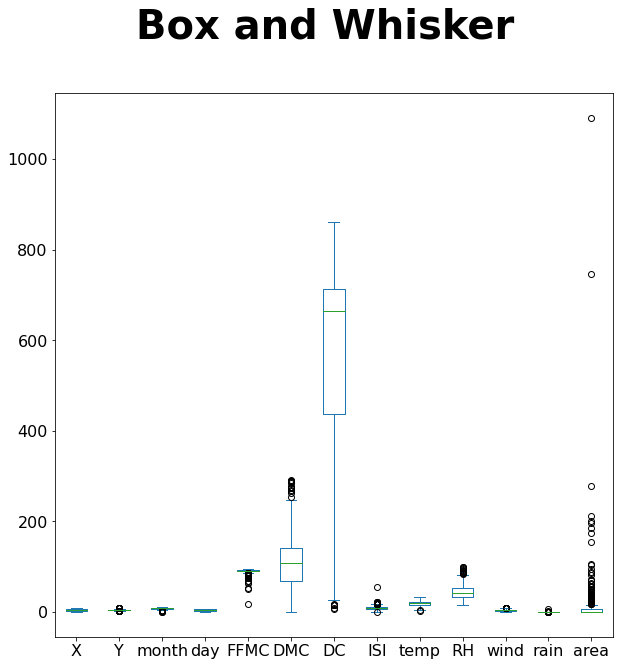

In [16]:
df.plot(kind='box',subplots=False,layout=(4,4),sharex=False,sharey=False,fontsize=16,figsize=(10,10))
plt.suptitle('Box and Whisker',y=1.00,fontweight='bold',fontsize=40)
plt.show()

## Scatter Matrix

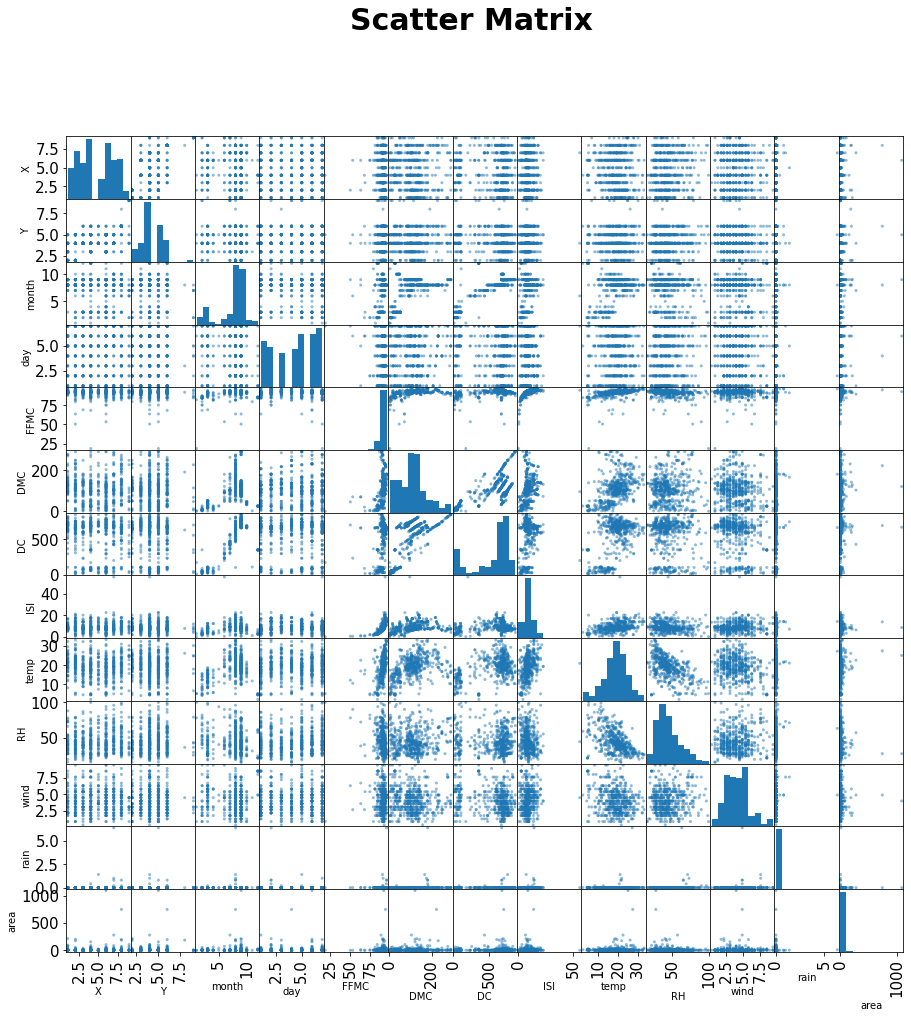

In [17]:
from pandas.plotting._matplotlib import scatter_matrix
Axes=scatter_matrix(df,figsize=(15,15))
plt.suptitle("Scatter Matrix",y=1.00,fontweight='bold',fontsize=30)
plt.rcParams['axes.labelsize'] = 15
[plt.setp(item.yaxis.get_majorticklabels(), 'size',15) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size',15) for item in Axes.ravel()]
plt.show()

DMC and DC have positive correlation as seen before in the pearson correlation

## Heat Map

<AxesSubplot:>

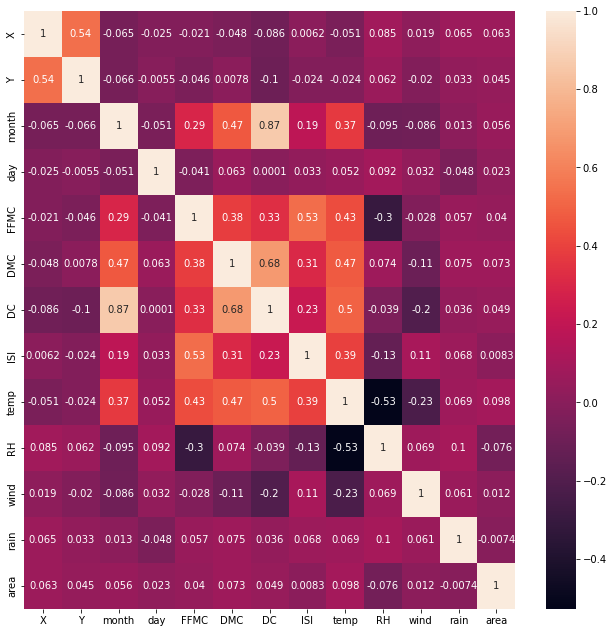

In [18]:
plt.figure(figsize=(11,11))
plt.style.use('default')
sns.heatmap(df.corr(), annot=True)

## Data Spliting

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [20]:
X, y = np.arange(10).reshape((5,2)), range(5)

In [21]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [22]:
list(y)

[0, 1, 2, 3, 4]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)


[[4 5]
 [0 1]
 [6 7]]
[[2 3]
 [8 9]]
[2, 0, 3]
[1, 4]


# KFold

In [25]:
dataset = range(16)

In [26]:
list(dataset)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [27]:
KFCrossValidator = KFold(n_splits=4, shuffle=False)
KFdataset = KFCrossValidator.split(dataset)

In [28]:
print('{} {:^50} {}'.format('Round','Training set','Testing set'))
for iteration, data in enumerate(KFdataset, start=1):
    print('{:^9} {} {:^25}'.format(iteration,data[0],str(data[1])))

Round                    Training set                    Testing set
    1     [ 4  5  6  7  8  9 10 11 12 13 14 15]         [0 1 2 3]        
    2     [ 0  1  2  3  8  9 10 11 12 13 14 15]         [4 5 6 7]        
    3     [ 0  1  2  3  4  5  6  7 12 13 14 15]       [ 8  9 10 11]      
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11]       [12 13 14 15]      


In [29]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [30]:
array = df.values
X = array[:,0:12]
y = array[:,12]

In [31]:
max_error_scoring = 'max_error'
neg_mean_absolute_error_scoring = 'neg_mean_absolute_error'
r2_scoring = 'r2'
neg_mean_squared_error_scoring = 'neg_mean_squared_error'

In [32]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('Ridge',Ridge()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [33]:
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_result1 = cross_val_score(model, X, y, cv=kfold, scoring=max_error_scoring)
    cv_result2 = cross_val_score(model, X, y, cv=kfold, scoring=neg_mean_absolute_error_scoring)
    cv_result3 = cross_val_score(model, X, y, cv=kfold, scoring=r2_scoring)
    cv_result4 = cross_val_score(model, X, y, cv=kfold, scoring=neg_mean_squared_error_scoring)
    msg = "%s: max error: %f , mean abs error: %f, r2: %f, mean squar error: %f" % (name,cv_result1.mean(), -cv_result2.mean(), cv_result3.mean(),-cv_result4.mean())
    print(msg)
    

LR: max error: -278.651811 , mean abs error: 19.923961, r2: -0.448206, mean squar error: 4072.408893
LASSO: max error: -273.551076 , mean abs error: 19.453062, r2: -0.290731, mean squar error: 4044.489363
EN: max error: -273.461816 , mean abs error: 19.429581, r2: -0.283493, mean squar error: 4042.781243
Ridge: max error: -276.361753 , mean abs error: 19.877511, r2: -0.398110, mean squar error: 4064.191522
KNN: max error: -313.945400 , mean abs error: 19.641672, r2: -1.500783, mean squar error: 4475.489977
CART: max error: -435.807000 , mean abs error: 25.228913, r2: -11.612458, mean squar error: 7126.814832
SVR: max error: -293.549242 , mean abs error: 12.844258, r2: -0.118160, mean squar error: 4190.566565


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [35]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

Lasso()

In [36]:
predictions = lasso_model.predict(X_test)
print(predictions)

[ 2.94995557 10.31741163  5.11331167  8.82953603  9.37472473  2.25890375
 16.70956165 10.21372406 12.71398315 17.82743566 12.00661147 -0.13366089
  2.05100125  9.61362391 20.35978817  4.46999326 11.4878202   8.22013444
 22.99636305  6.57213204 15.16990813  2.06185639  2.60841973 20.26525161
 17.97317314 15.84725657 11.22294233 18.07415259 19.27700019  6.71476154
 11.69520281  7.95309194 12.58956125  7.84373939 12.95490693  7.86654371
 10.29230298 13.12601655  7.55670958 18.24618339 10.86374712  0.84185952
 20.22670534  8.67143132 17.11750646  9.87835433 -0.41212642 12.75284261
  7.16986389  4.50527181 26.3280149  21.87386519 20.89573415 16.78773238
 21.87773448 16.31145194 12.17760756 21.10444723 19.24150053 13.21816328
  8.7358127   2.11532756 23.43585742  8.45085449 13.32288157  1.14739124
  7.81763591 13.16758569 12.31864714  7.13142564 21.82793694 15.85504258
  7.50956744  9.03027599  9.14037809 10.44621761 19.90381093 22.18118018
 10.29641445 15.17851613  8.17927973 16.67198374  9

## Deploying the model

In [37]:
import pickle
pickle.dump(lasso_model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [38]:
from flask import Flask, request
from flask_ngrok import run_with_ngrok
import requests

In [39]:
app = Flask(__name__)
run_with_ngrok(app)

In [40]:
@app.route('/predict',methods=['POST'])
def home():
    X = int(request.args.get('X',''))
    Y = int(request.args.get('Y',''))
    month = int(request.args.get('month',''))
    day = int(request.args.get('day',''))
    FFMC = float(request.args.get('FFMC',''))
    DMC = float(request.args.get('DMC',''))
    DC = float(request.args.get('DC',''))
    ISI = float(request.args.get('ISI',''))
    temp = float(request.args.get('temp',''))
    RH = float(request.args.get('RH',''))
    wind = float(request.args.get('wind',''))
    rain = float(request.args.get('rain',''))
    prediction = lasso_model.predict([[X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain]])
    print('**************************************')
    print(prediction)
    return 'Prediction is ' + str(prediction[0])

app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.9/threading.py", line 1286, in run
    self.function(*self.args, **self.kwargs)
  File "/home/mmanivannan/Envs/pluralsight/lib/python3.9/site-packages/flask_ngrok.py", line 70, in start_ngrok
    ngrok_address = _run_ngrok()
  File "/home/mmanivannan/Envs/pluralsight/lib/python3.9/site-packages/flask_ngrok.py", line 31, in _run_ngrok
    ngrok = subprocess.Popen([executable, 'http', '5000'])
  File "/usr/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.9/subprocess.py", line 1821, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
PermissionError: [Errno 13] Permission denied: '/tmp/ngrok/ngrok'
